# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

Here we will be experimenting with 3 algorithms

1. Logistic regression
2. DecisionTreeClassifier
3. RandomForestClassifier

In [8]:
!pip install --upgrade scikit-learn==0.20.3

  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\hp\anaconda3\lib\site-packages\scikit_learn-0.23.2.dist-info\
   from C:\Users\hp\anaconda3\Lib\site-packages\~cikit_learn-0.23.2.dist-info
  Moving to c:\users\hp\anaconda3\lib\site-packages\sklearn\
   from C:\Users\hp\anaconda3\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\hp\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-vx45zvq1\\scikit-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-vx45zvq1\\scikit-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hp\AppData\Local\Temp\pip-wheel-ds0un2nf'
       cwd: C:\Users\hp\AppData\Local\Temp\pip-install-vx45zvq1\scikit-learn\
  Complete output (678 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:/Users/hp/anaconda3\\Library\\lib']
    NOT AVAILABLE
  
  blis_info:
    l

  copying sklearn\ensemble\weight_boosting.py -> build\lib.win-amd64-3.8\sklearn\ensemble
  copying sklearn\ensemble\__init__.py -> build\lib.win-amd64-3.8\sklearn\ensemble
  creating build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_bagging.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_base.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_forest.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_gradient_boosting.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_gradient_boosting_loss_functions.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_iforest.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\test_partial_dependence.py -> build\lib.win-amd64-3.8\sklearn\ensemble\tests
  copying sklearn\ensemble\tests\t

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score, classification_report

from IPython.display import Image

In [11]:
# Loading Dataset
dataset = pd.read_csv('dataset.csv')

In [12]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
dataset.shape

(303, 14)

In [14]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:

corr= dataset.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Data Visualization:

# a.) Visualize the number of patients having a heart disease and not having a heart disease.
# b.) Visualize the age and weather patient has disease or not
# c.) Visualize correlation between all features using a heat map

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '0 : Patients not having a heart disease, 1: Patients having a heart disease')

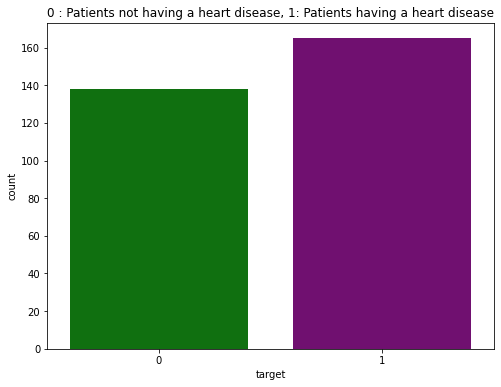

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(dataset.target, palette = ['green', 'purple'])
plt.title ("0 : Patients not having a heart disease, 1: Patients having a heart disease")

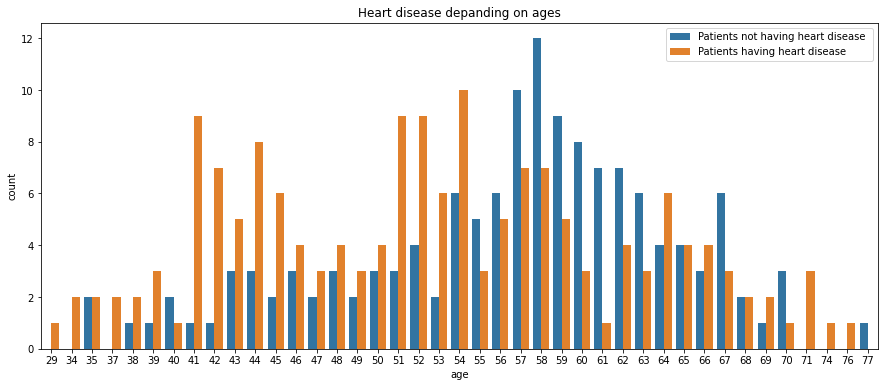

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'age', hue = 'target', data = dataset)
plt.title("Heart disease depanding on ages")
plt.legend(["Patients not having heart disease ","Patients having heart disease "], loc= "upper right")


<AxesSubplot:>

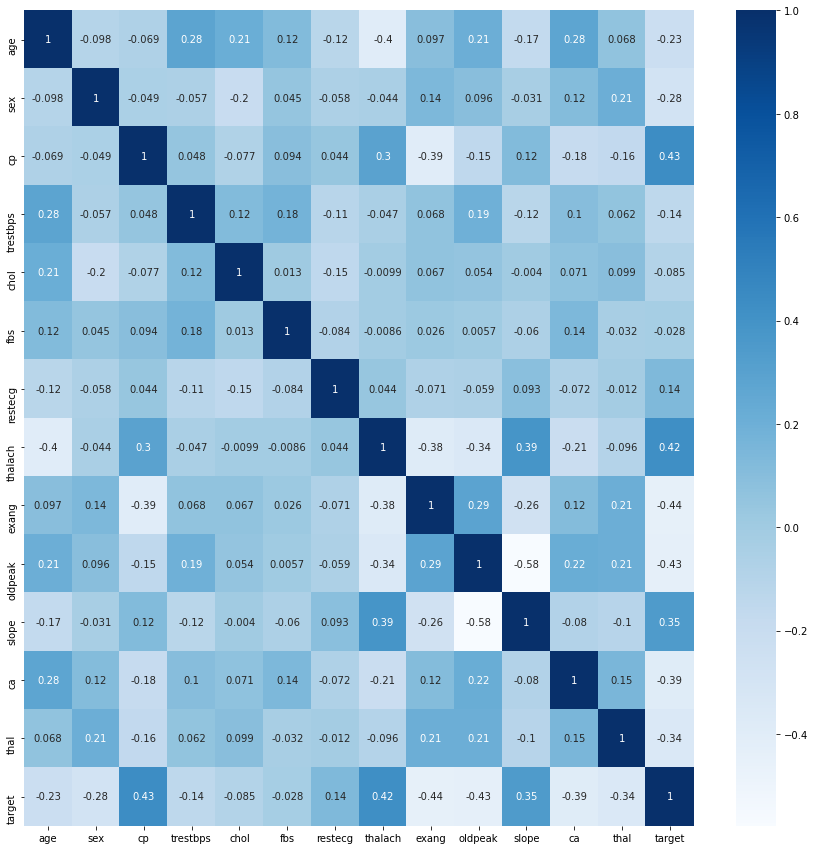

In [21]:

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Blues")

# Build a simple logistic regression model

In [22]:
x = pd.DataFrame(dataset.iloc[:, :-1])
y = pd.DataFrame(dataset.iloc[:, -1])


In [23]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)


In [26]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [27]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred_model_1 = model_1.predict(x_test)


In [29]:
y_pred_model_1 = pd.DataFrame(y_pred_model_1, columns=['Predicted Values'])
y_pred_model_1.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [30]:
conf_mat_model_1 = confusion_matrix (y_test, y_pred_model_1)
print (" Confusion Matrix for Logistic Regression Model: ")
conf_mat_model_1

 Confusion Matrix for Logistic Regression Model: 


array([[30, 11],
       [ 7, 43]], dtype=int64)

In [31]:
accuracy_model_1 = accuracy_score (y_test, y_pred_model_1)
print ("Accuracy for Logistic Regression Model: ")
accuracy_model_1

Accuracy for Logistic Regression Model: 


0.8021978021978022

# Build a decision tree model

In [32]:
model_2 = DecisionTreeClassifier()
model_2.fit (x_train, y_train)


DecisionTreeClassifier()

In [34]:
y_pred_model_2 = model_2.predict (x_test)

In [35]:
y_pred_model_2 = pd.DataFrame(y_pred_model_2,columns= ['Predicted Values'])
y_pred_model_2.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,1


In [36]:
conf_mat_model_2 = confusion_matrix (y_test, y_pred_model_2)
print (" Confusion Matrix for Decission Tree Model: ")
conf_mat_model_2

 Confusion Matrix for Decission Tree Model: 


array([[30, 11],
       [16, 34]], dtype=int64)

In [37]:
accuracy_model_2 = accuracy_score (y_test, y_pred_model_2)
print ("Accuracy for Decision Tree Model: ")
accuracy_model_2

Accuracy for Decision Tree Model: 


0.7032967032967034

In [40]:
from io import StringIO

In [42]:
dot_data = StringIO()

In [43]:
export_graphviz(model_2, out_file = dot_data)

In [44]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.496\\nsamples = 212\\nvalue = [97, 115]"] ;\n1 [label="X[8] <= 0.5\\ngini = 0.367\\nsamples = 99\\nvalue = [75, 24]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[11] <= 0.5\\ngini = 0.5\\nsamples = 43\\nvalue = [21, 22]"] ;\n1 -> 2 ;\n3 [label="X[12] <= 2.5\\ngini = 0.278\\nsamples = 24\\nvalue = [4, 20]"] ;\n2 -> 3 ;\n4 [label="X[7] <= 96.5\\ngini = 0.105\\nsamples = 18\\nvalue = [1, 17]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 17\\nvalue = [0, 17]"] ;\n4 -> 6 ;\n7 [label="X[4] <= 215.0\\ngini = 0.5\\nsamples = 6\\nvalue = [3, 3]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n7 -> 8 ;\n9 [label="X[3] <= 129.5\\ngini = 0.375\\nsamples = 4\\nvalue = [3, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n9 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 1\\nvalue = [0,

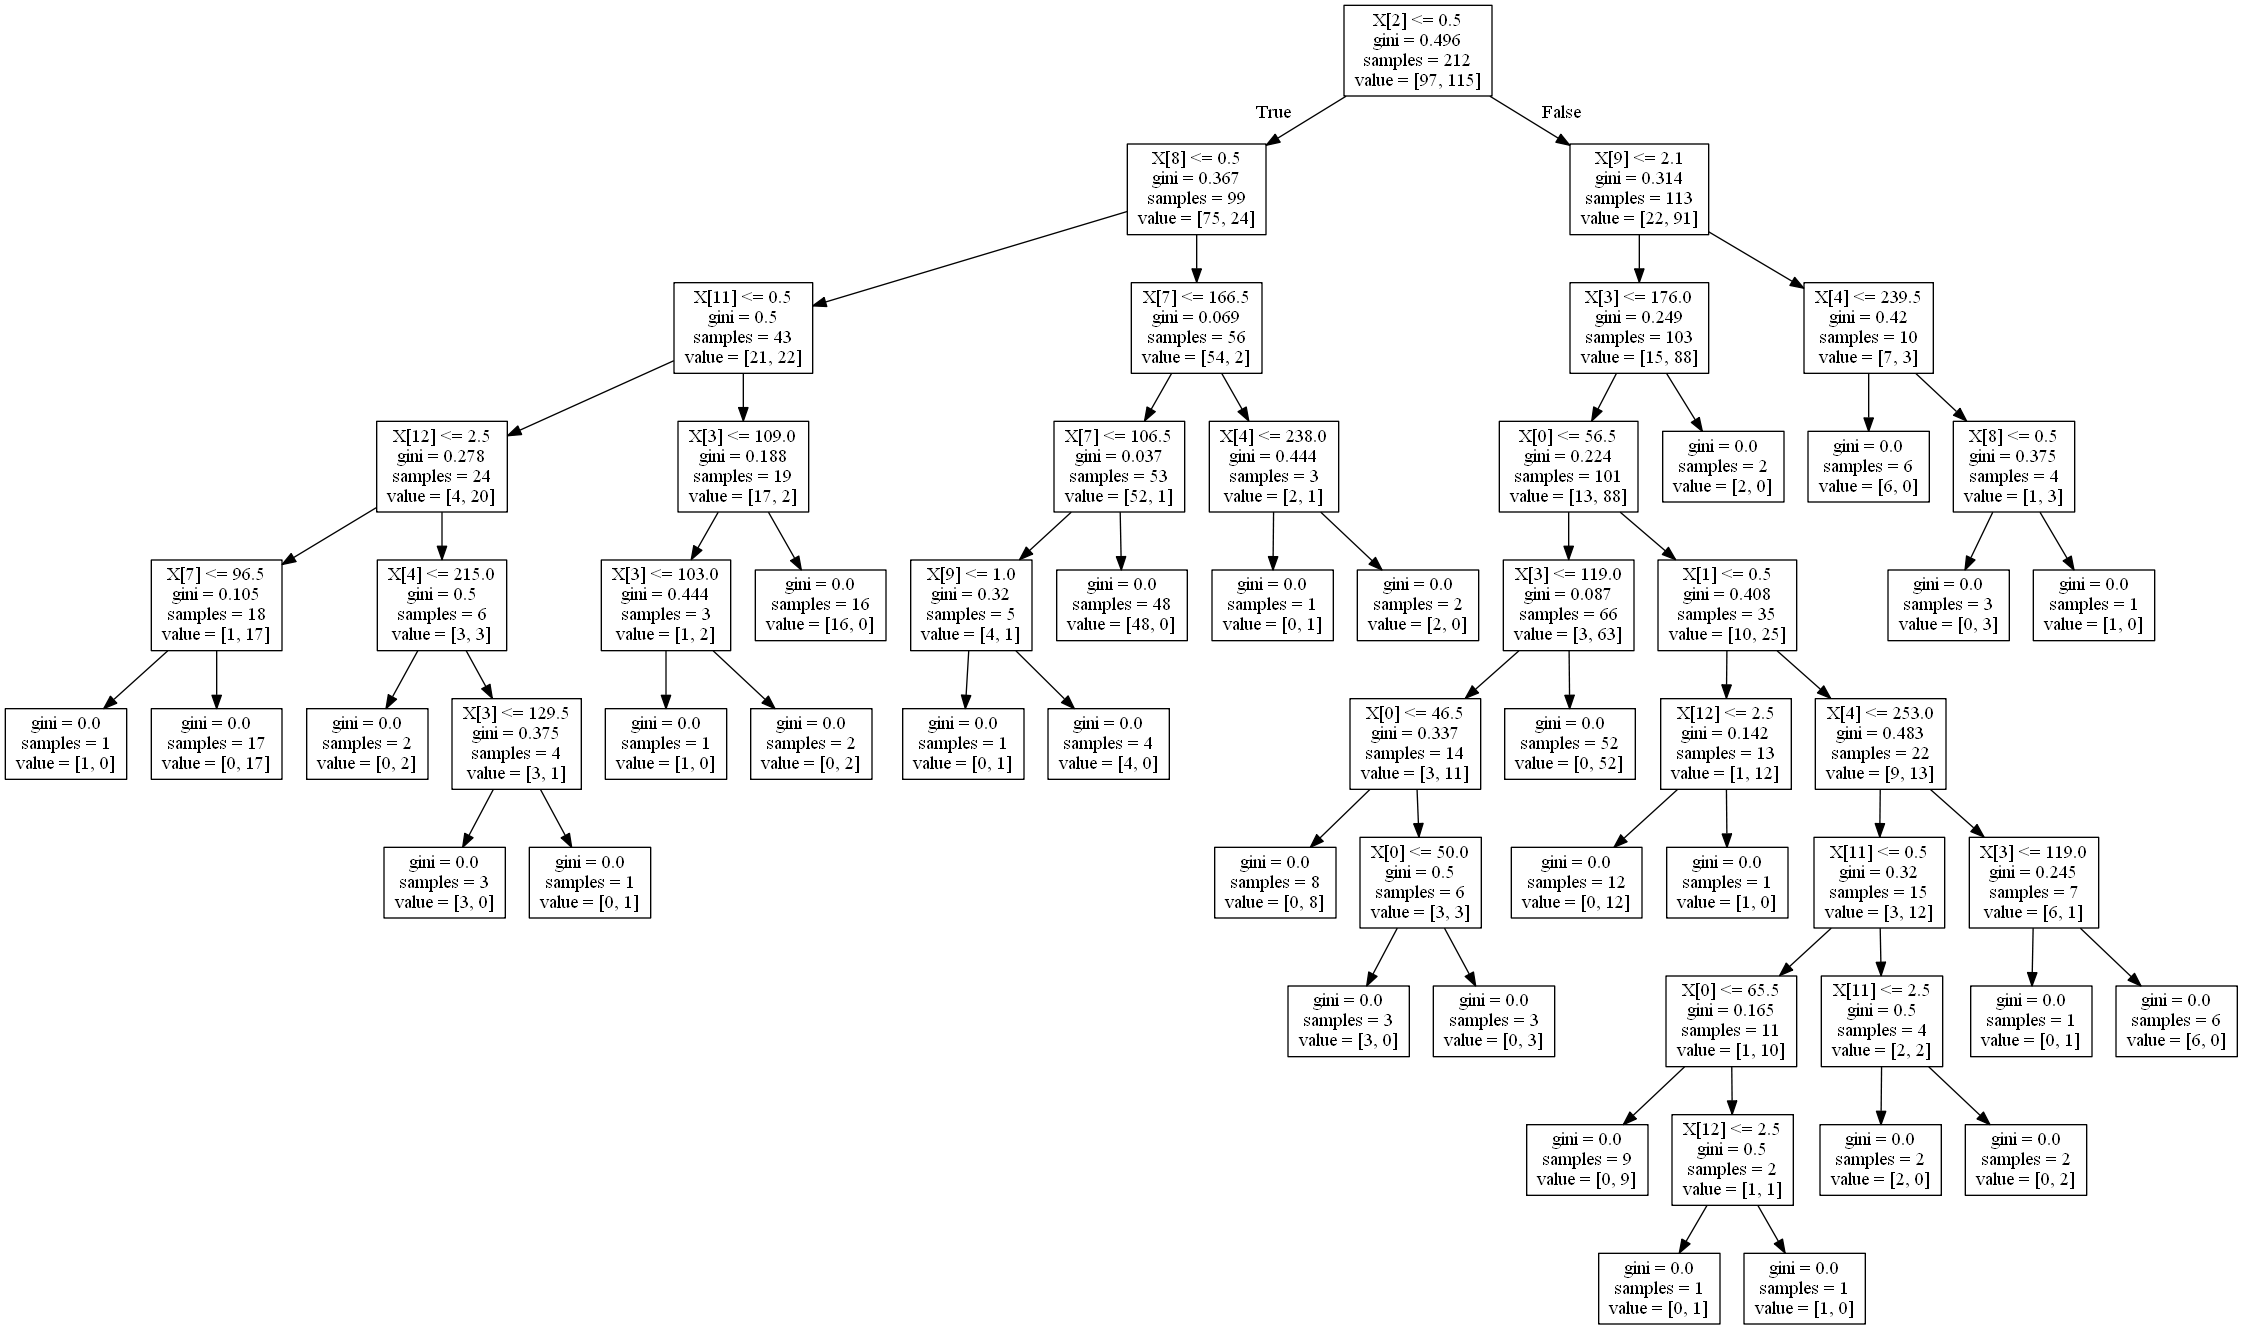

In [45]:
Image(graph.create_png())


# Build a Random Forest model 

In [46]:
model_3 = RandomForestClassifier()
model_3.fit(x_train,y_train)

<ipython-input-46-5eb119f4278f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train,y_train)


RandomForestClassifier()

In [47]:
y_pred_model_3 = model_3.predict(x_test)

In [48]:
y_pred_model_3 = pd.DataFrame(y_pred_model_3,columns=['Predicted Values'])
y_pred_model_3.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [49]:
conf_mat_model_3 = confusion_matrix (y_test, y_pred_model_3)
print (" Confusion Matrix for Random Forest Model: ")
conf_mat_model_3

 Confusion Matrix for Random Forest Model: 


array([[28, 13],
       [10, 40]], dtype=int64)

In [50]:
accuracy_model_3 = accuracy_score (y_test, y_pred_model_3)
print ("Accuracy for Random Forest Model: ")
accuracy_model_3

Accuracy for Random Forest Model: 


0.7472527472527473

In [51]:
dot_data_RF = StringIO()

In [52]:
export_graphviz(model_3.estimators_[0], out_file = dot_data_RF)

In [53]:
graph = pydotplus.graph_from_dot_data(dot_data_RF.getvalue())
dot_data_RF.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[8] <= 0.5\\ngini = 0.497\\nsamples = 130\\nvalue = [98, 114]"] ;\n1 [label="X[0] <= 56.5\\ngini = 0.393\\nsamples = 83\\nvalue = [36, 98]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[11] <= 1.5\\ngini = 0.134\\nsamples = 48\\nvalue = [6, 77]"] ;\n1 -> 2 ;\n3 [label="X[0] <= 40.0\\ngini = 0.1\\nsamples = 44\\nvalue = [4, 72]"] ;\n2 -> 3 ;\n4 [label="X[7] <= 155.0\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 4]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [2, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 4]"] ;\n4 -> 6 ;\n7 [label="X[4] <= 241.5\\ngini = 0.056\\nsamples = 41\\nvalue = [2, 68]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 23\\nvalue = [0, 43]"] ;\n7 -> 8 ;\n9 [label="X[1] <= 0.5\\ngini = 0.137\\nsamples = 18\\nvalue = [2, 25]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 9\\nvalue = [0, 12]"] ;\n9 -> 10 ;\n11 [label="X[0] <= 47.5\\ngini = 0.231\\nsamp

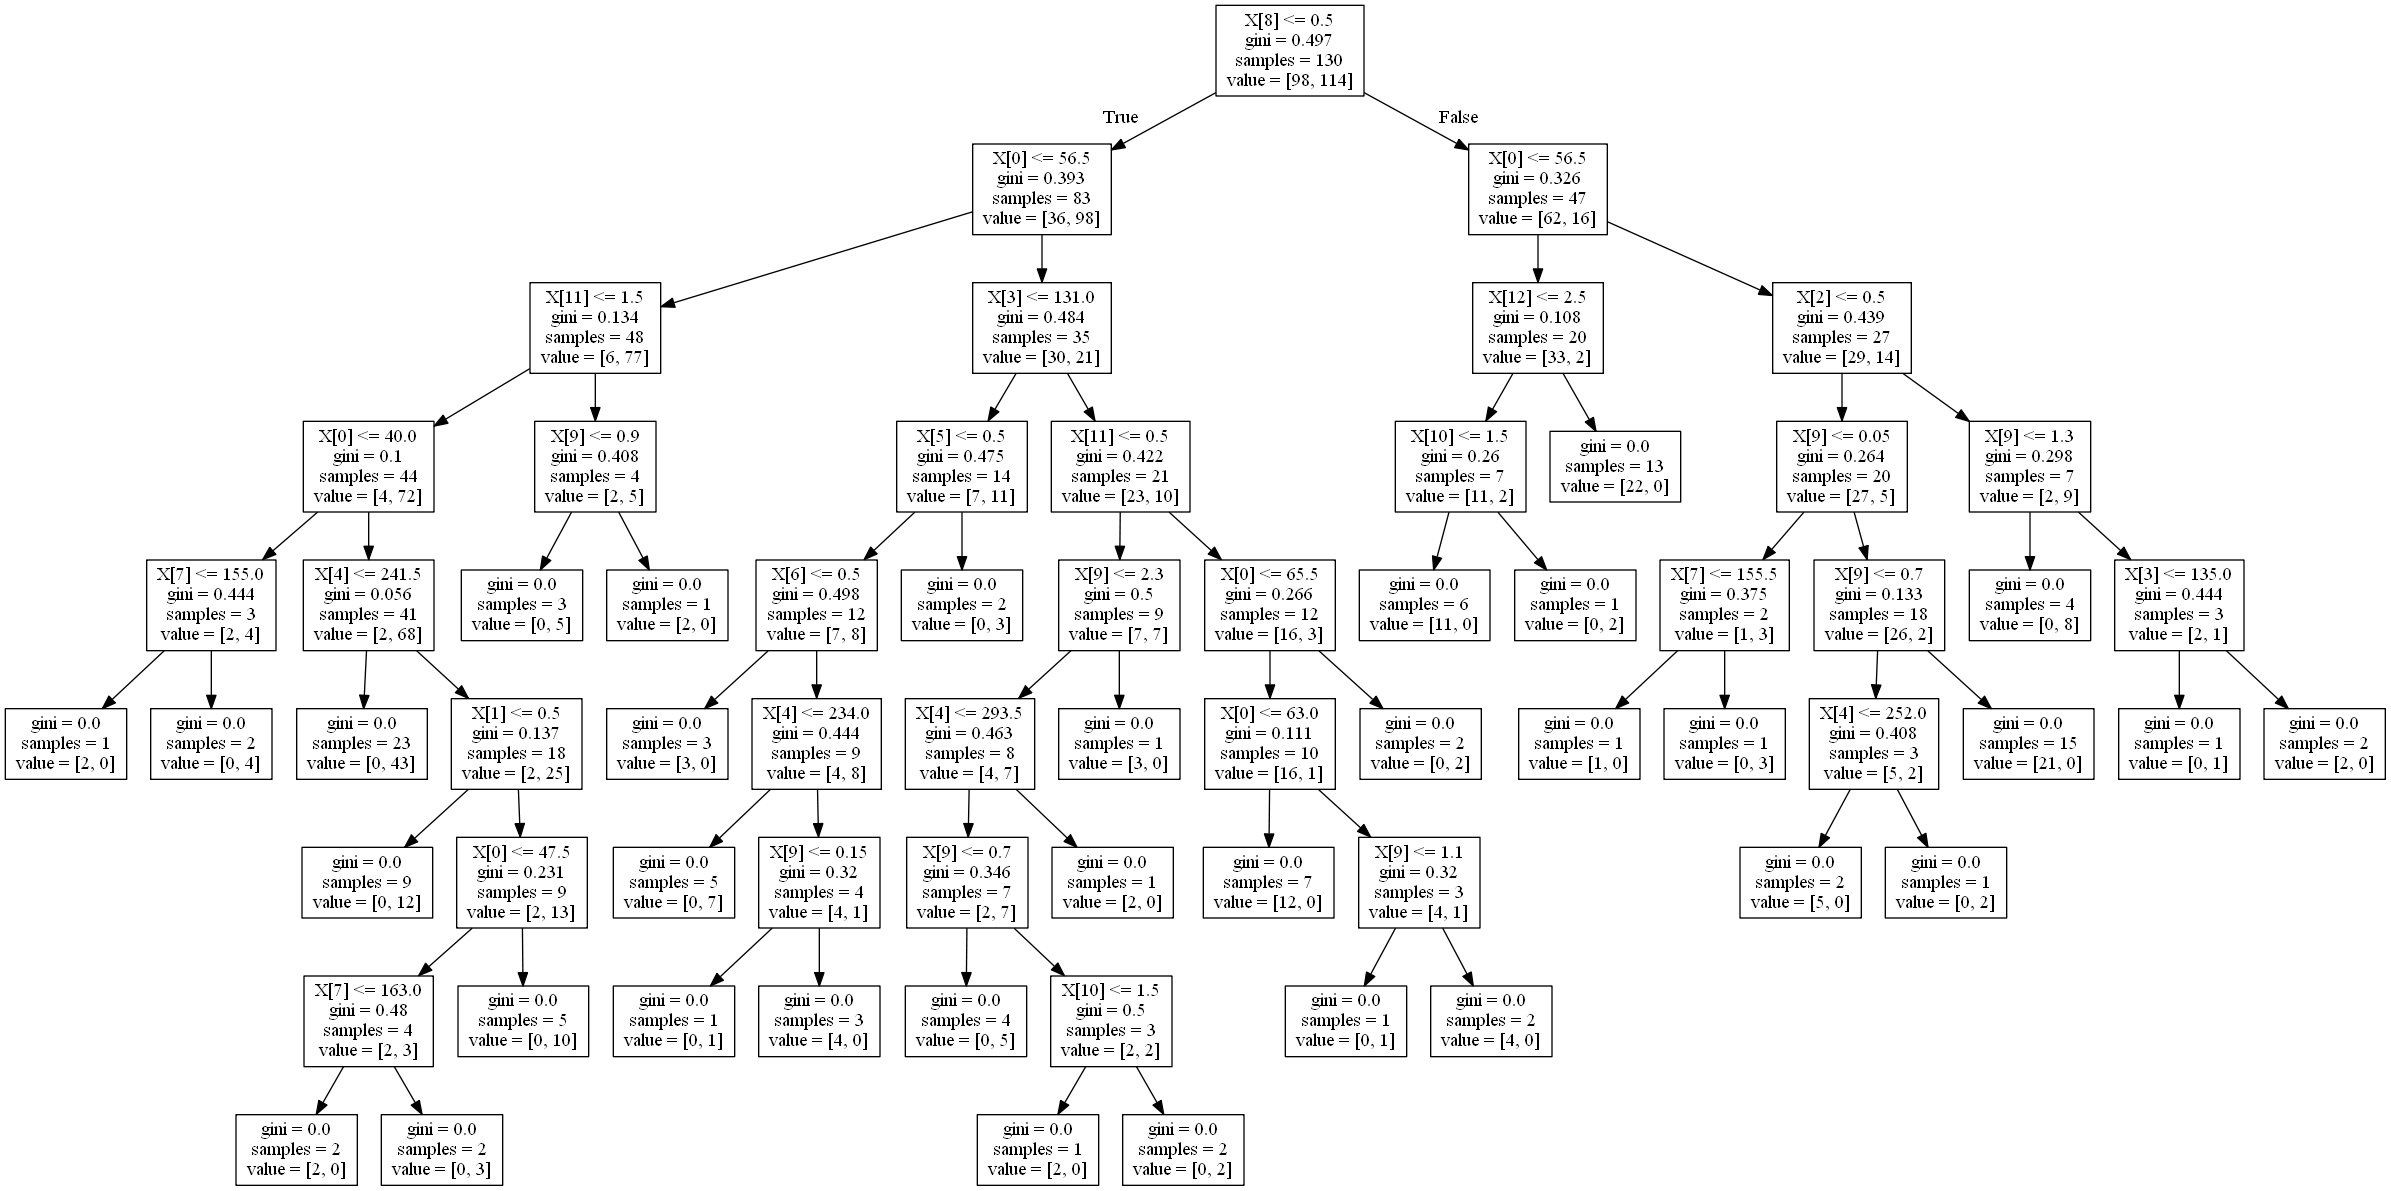

In [54]:
Image(graph.create_png())

# a.) Print the confusion matrix of all classifiers
# b.) Print the classification report of all classifiers
# c.) Calculate Recall Precision and F1 score of all the models
# d.) Visualize confusion matrix using heatmaps and Recall Precision and F1 score of all the models using bar graphs
# e.) Select the best model based on the best accuracies

In [55]:
print (" Confusion Matrix for Logistic Regression: ")
print (conf_mat_model_1)
print (" Confusion Matrix for Decision Tree: ")
print (conf_mat_model_2)
print (" Confusion Matrix for Random Forest: ")
print (conf_mat_model_3)

 Confusion Matrix for Logistic Regression: 
[[30 11]
 [ 7 43]]
 Confusion Matrix for Decision Tree: 
[[30 11]
 [16 34]]
 Confusion Matrix for Random Forest: 
[[28 13]
 [10 40]]


In [56]:
print (" Classification Report for Logistic Regression: ")
classification_report(y_test, y_pred_model_1)

 Classification Report for Logistic Regression: 


'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77        41\n           1       0.80      0.86      0.83        50\n\n    accuracy                           0.80        91\n   macro avg       0.80      0.80      0.80        91\nweighted avg       0.80      0.80      0.80        91\n'

In [57]:
print (" Classification Report for Decision Tree: ")
classification_report(y_test, y_pred_model_2)


 Classification Report for Decision Tree: 


'              precision    recall  f1-score   support\n\n           0       0.65      0.73      0.69        41\n           1       0.76      0.68      0.72        50\n\n    accuracy                           0.70        91\n   macro avg       0.70      0.71      0.70        91\nweighted avg       0.71      0.70      0.70        91\n'

In [58]:

print (" Classification Report for Random Forest: ")
classification_report(y_test, y_pred_model_3)

 Classification Report for Random Forest: 


'              precision    recall  f1-score   support\n\n           0       0.74      0.68      0.71        41\n           1       0.75      0.80      0.78        50\n\n    accuracy                           0.75        91\n   macro avg       0.75      0.74      0.74        91\nweighted avg       0.75      0.75      0.75        91\n'

In [59]:
score = { 'Logistic_Reg': [accuracy_model_1] , 'Decision_Tree': [accuracy_model_2], 'Random_Forest': [accuracy_model_3]}
score_df = pd.DataFrame(score)
score_df

,Logistic_Reg,Decision_Tree,Random_Forest
0,0.802198,0.703297,0.747253


<AxesSubplot:>

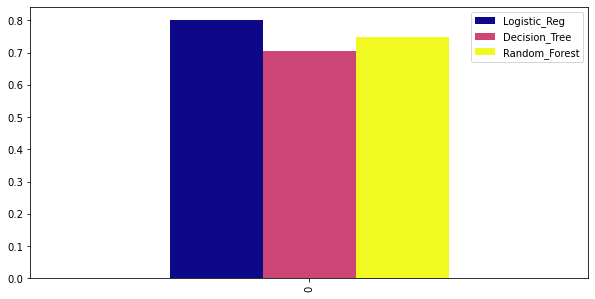

In [60]:
score_df.plot(kind='bar', figsize=(10, 5), colormap='plasma')


In [61]:
conf_mat_final = {'Logistic_Reg': conf_mat_model_1, 'Decision_Tree': conf_mat_model_2, 'Random_Forest': conf_mat_model_3 }

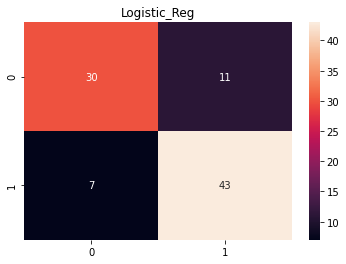

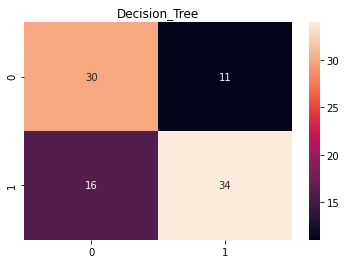

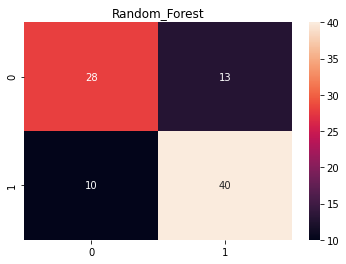

In [62]:
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [63]:
print (" Accuracy for Logistic Regression: ")
print (accuracy_model_1)
print (" Accuracy for Decision Tree: ")
print (accuracy_model_2)
print (" Accuracy for Random Forest: ")
print (accuracy_model_3)


 Accuracy for Logistic Regression: 
0.8021978021978022
 Accuracy for Decision Tree: 
0.7032967032967034
 Accuracy for Random Forest: 
0.7472527472527473


In [64]:
print ("The best model based on the best accuracies is Logistic Regression with accuracy: ")
print (accuracy_model_1)

The best model based on the best accuracies is Logistic Regression with accuracy: 
0.8021978021978022
